In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
model = tf.keras.models.load_model('../data/networks/network_10/network_10_best_model.h5')
weights = model.get_weights()

In [67]:
inputs = np.repeat(np.linspace(-1, 1, 5)[:, np.newaxis], 5, axis=1)
inputs.shape

(5, 5)

In [68]:
inputs

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

In [69]:
a, b, c, d, e = np.meshgrid(*inputs.T)

In [76]:
inputs = []
for x in [a, b, c, d, e]:
    inputs.append(x.flatten())
inputs = np.array(inputs).T

In [78]:
outputs = model.predict(inputs)
outputs.shape

(3125, 5)

In [81]:
columns = ['f_evol', 'mass', 'mlt', 'y', 'z', 'age', 'teff', 'rad', 'dnu', 'mhs']

In [82]:
df = pd.DataFrame(np.concatenate((inputs, outputs), axis=1), columns=columns)
df

,f_evol,mass,mlt,y,z,age,teff,rad,dnu,mhs
0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.924989,0.117231,-0.706183,1.315324,-1.314773
1,-1.0,-1.0,-1.0,-1.0,-0.5,-0.647798,-0.514205,-0.747491,1.471433,-0.493131
2,-1.0,-1.0,-1.0,-1.0,0.0,-0.458334,-0.957756,-0.762291,1.528834,-0.009243
3,-1.0,-1.0,-1.0,-1.0,0.5,-0.299317,-1.328033,-0.768726,1.554473,0.336240
4,-1.0,-1.0,-1.0,-1.0,1.0,-0.182375,-1.590258,-0.776910,1.583587,0.607125
...,...,...,...,...,...,...,...,...,...,...
3120,1.0,1.0,1.0,1.0,-1.0,-0.572442,1.672418,1.309603,-1.082922,-1.382607
3121,1.0,1.0,1.0,1.0,-0.5,-0.313068,0.952607,1.241958,-1.018067,-0.627011
3122,1.0,1.0,1.0,1.0,0.0,-0.131024,0.678005,1.042450,-0.888683,-0.052579
3123,1.0,1.0,1.0,1.0,0.5,0.022014,0.468977,0.883895,-0.779085,0.340442


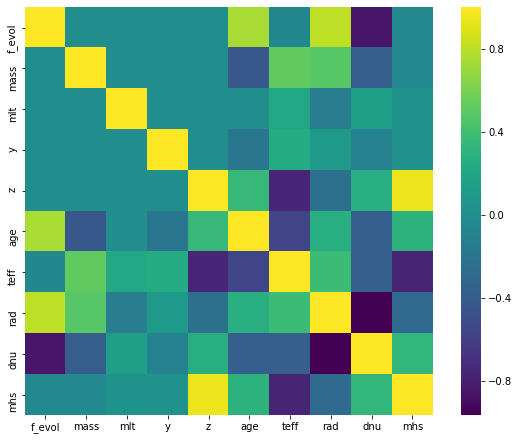

In [96]:
plt.subplots(figsize=(10,7.5))
ax = sns.heatmap(df.corr(), square=True, cmap='viridis')